In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names
target_names = wine.target_names

In [4]:
X.shape


(178, 13)

In [5]:
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
X_pca[:5]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082]])

In [11]:
pca.explained_variance_

array([4.73243698, 2.51108093])

In [12]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

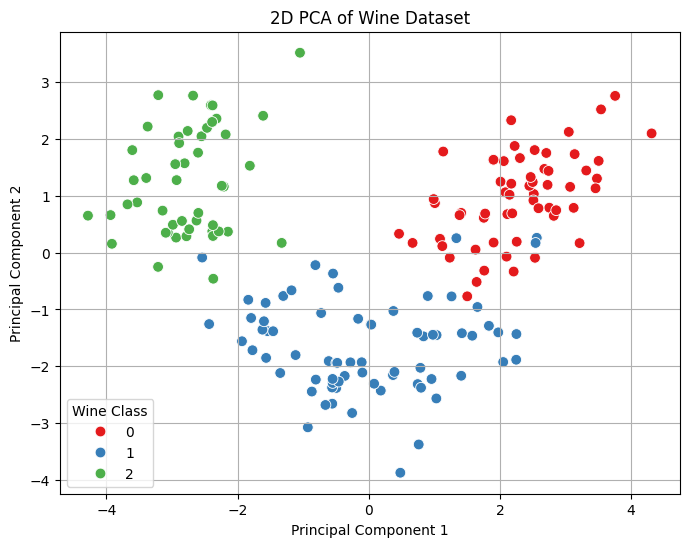

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine.target, palette="Set1", s=60)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Wine Dataset")
plt.legend(title="Wine Class", loc='best')
plt.grid(True)
plt.show()


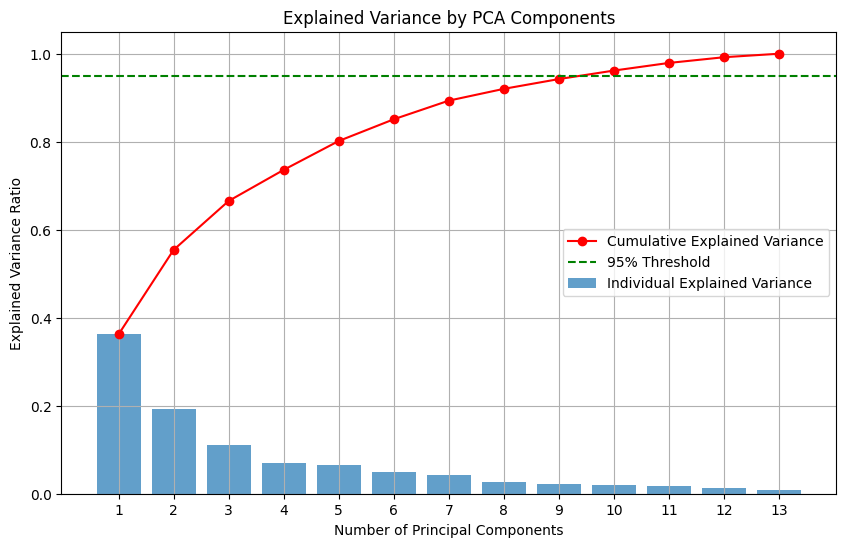

In [14]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 14), pca_full.explained_variance_ratio_, alpha=0.7, label="Individual Explained Variance")
plt.plot(range(1, 14), np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='r', label="Cumulative Explained Variance")
plt.xticks(range(1, 14))
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by PCA Components")
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed to retain at least 95% variance: {components_needed}")



Number of components needed to retain at least 95% variance: 10


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

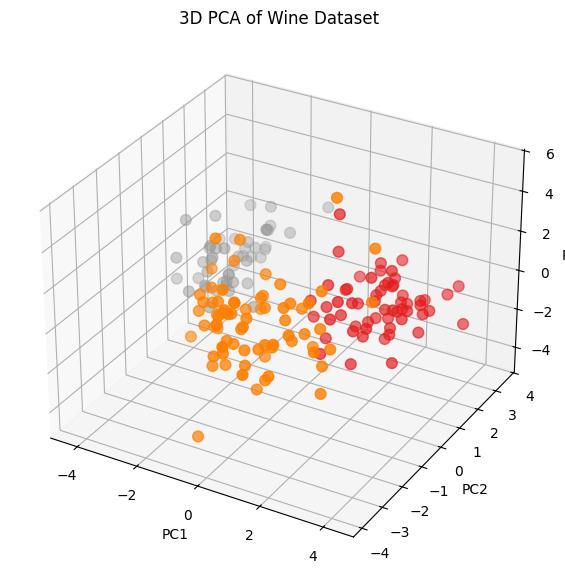

In [16]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Set1', s=60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of Wine Dataset")
legend = ax.legend(handles=scatter.legend_elements()[0], labels=target_names, title="Wine Class")
ax.add_artist(legend)
plt.show()